# Latent Dirichlet Allocation with Gensim

In [1]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
import pickle
from gensim import corpora, models
from nltk import pos_tag
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim 
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
import tmtoolkit

In [2]:
np.random.seed(42)

In [3]:
dtm = pd.read_pickle('dtm.pkl')
corpus = pd.read_pickle('all_text_clean.pkl')

In [4]:
dtm.head()

,aaa,aaaaaevgncl,aakiydertvy,aaron,abandonment,abbot,abbott,abc,abdus,abhorrence,...,zink,zombie,zombies,zone,zones,zuckerbergs,zux,zuyubaetw,zwf,Permalink
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1462379490609461
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1462715223909221
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1461150450732365
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1462158127298264
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1462708023909941


In [5]:
corpus.head()

,Permalink,full_text,text
1,1462379490609461,I’ve never seen this much unrest in the states...,never seen much unrest states anyone else
2,1462715223909221,ATTENTION BUSINESS OWNERS AND ALL THE MASKED P...,attention business owners masked people severi...
3,1461150450732365,This is whats wrong with attention seeking mil...,whats wrong attention seeking millenials young...
4,1462158127298264,Upset Californian Conservative,upset californian conservative
5,1462708023909941,Live Stream. CREW dragon launch.,live stream crew dragon launch


In [6]:
tokenizer = RegexpTokenizer(r'\w+')

In [7]:
corpus['tokenized_text'] = [tokenizer.tokenize(text) for text in corpus['text']]

In [8]:
corpus.head()

,Permalink,full_text,text,tokenized_text
1,1462379490609461,I’ve never seen this much unrest in the states...,never seen much unrest states anyone else,"[never, seen, much, unrest, states, anyone, else]"
2,1462715223909221,ATTENTION BUSINESS OWNERS AND ALL THE MASKED P...,attention business owners masked people severi...,"[attention, business, owners, masked, people, ..."
3,1461150450732365,This is whats wrong with attention seeking mil...,whats wrong attention seeking millenials young...,"[whats, wrong, attention, seeking, millenials,..."
4,1462158127298264,Upset Californian Conservative,upset californian conservative,"[upset, californian, conservative]"
5,1462708023909941,Live Stream. CREW dragon launch.,live stream crew dragon launch,"[live, stream, crew, dragon, launch]"


# Gensim

I went through and ran different models for different collections of words. First all words minus the stopwords, then only nouns, and last only nouns and adjectives. I used Coherence Score as my metric to compare the results. The larger the coherence score the better the model. Based on the score, the model with only nouns performed the best with 5 topics. Using this information, I then set up a loop to manually grid search to find the best number of topics.

In [9]:
#model with 3 topics and all words
dictionary = corpora.Dictionary(corpus['tokenized_text'])

In [10]:
corpus_dic = [dictionary.doc2bow(text) for text in corpus['tokenized_text']]

In [11]:
ldamodel = models.ldamodel.LdaModel(corpus_dic, num_topics=3, id2word = dictionary, passes=200, random_state =42)

In [12]:
ldamodel.print_topics()

[(0,
  '0.011*"like" + 0.009*"see" + 0.007*"mask" + 0.007*"law" + 0.005*"one" + 0.005*"masks" + 0.005*"abbott" + 0.005*"people" + 0.005*"needs" + 0.005*"th"'),
 (1,
  '0.038*"normal" + 0.029*"new" + 0.010*"never" + 0.008*"say" + 0.007*"see" + 0.005*"business" + 0.005*"way" + 0.005*"accept" + 0.005*"us" + 0.005*"media"'),
 (2,
  '0.016*"people" + 0.012*"see" + 0.010*"money" + 0.008*"get" + 0.007*"back" + 0.006*"virus" + 0.006*"vote" + 0.006*"stop" + 0.006*"businesses" + 0.005*"go"')]

In [13]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus_dic))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=corpus['tokenized_text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.290998529528862

Coherence Score:  0.254902120432737


In [14]:
#all words and 5 topics
ldamodel = models.ldamodel.LdaModel(corpus_dic, num_topics=5, id2word = dictionary, passes=200, random_state = 42)

In [15]:
ldamodel.print_topics()

[(0,
  '0.013*"like" + 0.011*"law" + 0.010*"one" + 0.009*"see" + 0.008*"mask" + 0.007*"th" + 0.007*"people" + 0.006*"looks" + 0.006*"court" + 0.006*"wearing"'),
 (1,
  '0.014*"see" + 0.010*"get" + 0.010*"never" + 0.008*"people" + 0.008*"accept" + 0.007*"business" + 0.007*"us" + 0.006*"said" + 0.006*"way" + 0.006*"think"'),
 (2,
  '0.043*"normal" + 0.032*"new" + 0.016*"people" + 0.010*"back" + 0.009*"money" + 0.009*"vote" + 0.009*"see" + 0.007*"like" + 0.007*"businesses" + 0.007*"get"'),
 (3,
  '0.009*"need" + 0.008*"hell" + 0.007*"oh" + 0.006*"exactly" + 0.006*"get" + 0.006*"see" + 0.006*"yeah" + 0.005*"many" + 0.005*"bad" + 0.005*"sick"'),
 (4,
  '0.009*"see" + 0.008*"stop" + 0.008*"people" + 0.007*"know" + 0.007*"business" + 0.006*"put" + 0.006*"texas" + 0.006*"love" + 0.006*"money" + 0.006*"state"')]

In [16]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus_dic))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=corpus['tokenized_text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.425864837317796

Coherence Score:  0.3292574859991648


## Nouns

In [17]:
is_noun = lambda pos: pos[:2] == 'NN'

nouns = []
for i in corpus.index:
    nouns.append([word for (word, pos) in pos_tag(corpus.loc[i,'tokenized_text']) if is_noun(pos)])
corpus['nouns'] = nouns

In [18]:
corpus.head()

,Permalink,full_text,text,tokenized_text,nouns
1,1462379490609461,I’ve never seen this much unrest in the states...,never seen much unrest states anyone else,"[never, seen, much, unrest, states, anyone, else]","[states, anyone]"
2,1462715223909221,ATTENTION BUSINESS OWNERS AND ALL THE MASKED P...,attention business owners masked people severi...,"[attention, business, owners, masked, people, ...","[attention, business, owners, people, severity..."
3,1461150450732365,This is whats wrong with attention seeking mil...,whats wrong attention seeking millenials young...,"[whats, wrong, attention, seeking, millenials,...","[whats, attention, millenials, woman, geco, co..."
4,1462158127298264,Upset Californian Conservative,upset californian conservative,"[upset, californian, conservative]",[]
5,1462708023909941,Live Stream. CREW dragon launch.,live stream crew dragon launch,"[live, stream, crew, dragon, launch]","[stream, crew, dragon, launch]"


In [19]:
dictionary = corpora.Dictionary(corpus['nouns'])

corpus_dic = [dictionary.doc2bow(text) for text in corpus['nouns']]

ldamodel = models.ldamodel.LdaModel(corpus_dic, num_topics=3, id2word = dictionary, passes=200, random_state = 42)

ldamodel.print_topics()

[(0,
  '0.019*"business" + 0.015*"mask" + 0.013*"law" + 0.013*"businesses" + 0.012*"people" + 0.010*"masks" + 0.007*"home" + 0.007*"see" + 0.007*"government" + 0.007*"media"'),
 (1,
  '0.010*"governor" + 0.010*"abbott" + 0.010*"vote" + 0.009*"see" + 0.009*"people" + 0.008*"shit" + 0.008*"virus" + 0.007*"th" + 0.007*"thing" + 0.007*"court"'),
 (2,
  '0.033*"people" + 0.023*"money" + 0.012*"way" + 0.011*"time" + 0.010*"state" + 0.008*"news" + 0.008*"see" + 0.007*"power" + 0.007*"church" + 0.007*"governors"')]

In [20]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus_dic))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=corpus['nouns'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.053957113684797

Coherence Score:  0.5231706909597464


In [21]:
dictionary = corpora.Dictionary(corpus['nouns'])

corpus_dic = [dictionary.doc2bow(text) for text in corpus['nouns']]

ldamodel = models.ldamodel.LdaModel(corpus_dic, num_topics=5, id2word = dictionary, passes=200, random_state = 42)

ldamodel.print_topics()

[(0,
  '0.023*"law" + 0.022*"businesses" + 0.022*"business" + 0.017*"mask" + 0.017*"home" + 0.015*"people" + 0.010*"masks" + 0.010*"tv" + 0.009*"money" + 0.009*"face"'),
 (1,
  '0.018*"abbott" + 0.012*"th" + 0.012*"court" + 0.011*"world" + 0.010*"bs" + 0.009*"needs" + 0.009*"need" + 0.009*"gov" + 0.008*"circuit" + 0.007*"governor"'),
 (2,
  '0.027*"people" + 0.016*"vote" + 0.011*"power" + 0.011*"church" + 0.011*"governors" + 0.011*"see" + 0.010*"state" + 0.009*"news" + 0.009*"media" + 0.009*"watch"'),
 (3,
  '0.012*"texas" + 0.012*"hell" + 0.009*"virus" + 0.009*"life" + 0.009*"guess" + 0.008*"money" + 0.008*"thank" + 0.008*"someone" + 0.008*"care" + 0.007*"freedom"'),
 (4,
  '0.037*"people" + 0.020*"money" + 0.015*"thing" + 0.013*"shit" + 0.012*"see" + 0.011*"government" + 0.011*"democrats" + 0.011*"control" + 0.011*"way" + 0.008*"refuse"')]

In [22]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus_dic))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=corpus['nouns'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Perplexity:  -8.212555976012236

Coherence Score:  0.5439348787011479


## Nouns and Adjectives

In [23]:
is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'

nouns_adj = []
for i in corpus.index:
    nouns_adj.append([word for (word, pos) in pos_tag(corpus.loc[i,'tokenized_text']) if is_noun_adj(pos)])
corpus['nouns_adj'] = nouns_adj

In [24]:
dictionary = corpora.Dictionary(corpus['nouns_adj'])

corpus_dic = [dictionary.doc2bow(text) for text in corpus['nouns_adj']]

ldamodel = models.ldamodel.LdaModel(corpus_dic, num_topics=3, id2word = dictionary, passes=200, random_state = 42)

ldamodel.print_topics()

[(0,
  '0.014*"see" + 0.014*"people" + 0.013*"mask" + 0.012*"business" + 0.009*"businesses" + 0.007*"masks" + 0.007*"media" + 0.006*"money" + 0.006*"right" + 0.006*"government"'),
 (1,
  '0.012*"people" + 0.011*"law" + 0.010*"money" + 0.007*"th" + 0.006*"need" + 0.006*"way" + 0.006*"home" + 0.005*"state" + 0.005*"court" + 0.005*"time"'),
 (2,
  '0.049*"normal" + 0.037*"new" + 0.013*"people" + 0.008*"way" + 0.007*"time" + 0.007*"democrats" + 0.006*"shit" + 0.006*"vote" + 0.005*"power" + 0.005*"virus"')]

In [25]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus_dic))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=corpus['nouns_adj'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.214190613943678

Coherence Score:  0.47174469184566203


In [26]:
dictionary = corpora.Dictionary(corpus['nouns_adj'])

corpus_dic = [dictionary.doc2bow(text) for text in corpus['nouns_adj']]

ldamodel = models.ldamodel.LdaModel(corpus_dic, num_topics=5, id2word = dictionary, passes=200, random_state = 42)

ldamodel.print_topics()

[(0,
  '0.021*"mask" + 0.016*"people" + 0.014*"businesses" + 0.014*"see" + 0.013*"business" + 0.007*"stupid" + 0.007*"hell" + 0.007*"small" + 0.007*"much" + 0.006*"work"'),
 (1,
  '0.017*"law" + 0.016*"money" + 0.010*"people" + 0.009*"home" + 0.009*"way" + 0.009*"business" + 0.008*"stay" + 0.008*"need" + 0.007*"stop" + 0.007*"masks"'),
 (2,
  '0.015*"people" + 0.013*"bad" + 0.008*"church" + 0.008*"good" + 0.007*"lie" + 0.006*"watch" + 0.006*"looks" + 0.006*"god" + 0.006*"shit" + 0.005*"texas"'),
 (3,
  '0.012*"democrats" + 0.010*"news" + 0.009*"governors" + 0.009*"media" + 0.007*"state" + 0.007*"bitch" + 0.007*"see" + 0.006*"liberal" + 0.006*"evil" + 0.006*"hate"'),
 (4,
  '0.063*"normal" + 0.048*"new" + 0.017*"people" + 0.010*"abbott" + 0.009*"many" + 0.009*"vote" + 0.008*"old" + 0.007*"power" + 0.007*"governor" + 0.007*"way"')]

In [27]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus_dic))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=corpus['nouns_adj'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.371281717510834

Coherence Score:  0.44868106998226454


## Tuning by Coherence Score

As you can see from the graph below, with Random State set to 42, the optimal number of topics seems to be 14. (I will point out that if you change the random state the optimal topical number will fluctuate with it). 

In [28]:
np.random.seed(42)

dictionary = corpora.Dictionary(corpus['nouns'])

corpus_dic = [dictionary.doc2bow(text) for text in corpus['nouns']]

coherence_score = []

for num in range(5, 15, 1):

    ldamodel = models.ldamodel.LdaModel(corpus_dic, num_topics=num, id2word = dictionary, passes=10, random_state = 42)

    coherence_model_lda = CoherenceModel(model=ldamodel, texts=corpus['nouns'], dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence = {}
    coherence['num_topics'] = num
    coherence['score'] = coherence_lda
    coherence_score.append(coherence)
    print(f'testing number of topics: {num}')
    
coherence_df = pd.DataFrame(coherence_score)
print(coherence_df)

testing number of topics: 5
testing number of topics: 6
testing number of topics: 7
testing number of topics: 8
testing number of topics: 9
testing number of topics: 10
testing number of topics: 11
testing number of topics: 12
testing number of topics: 13
testing number of topics: 14
   num_topics     score
0           5  0.551587
1           6  0.591813
2           7  0.588149
3           8  0.602252
4           9  0.586126
5          10  0.586653
6          11  0.606183
7          12  0.598458
8          13  0.610120
9          14  0.613121


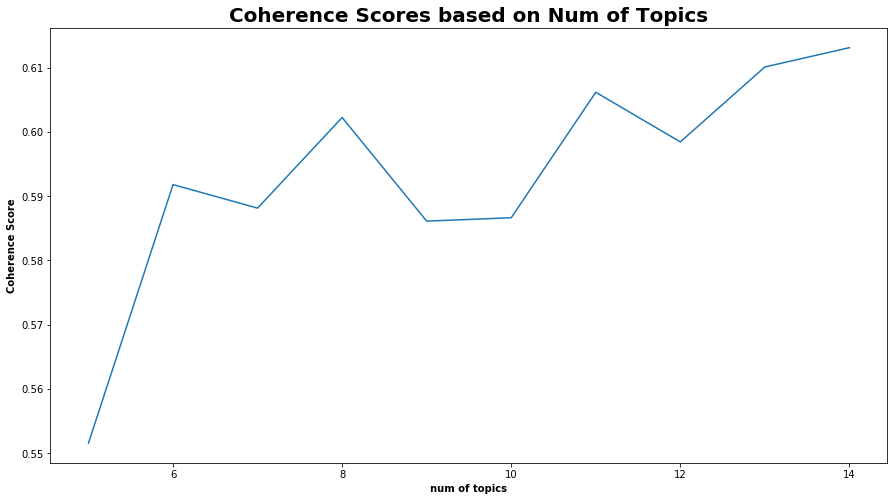

In [29]:
plt.figure(figsize = (15,8))
plt.plot(coherence_df['num_topics'], coherence_df['score'])
plt.title("Coherence Scores based on Num of Topics", weight = 'bold', fontsize = 20)
plt.xlabel('num of topics', weight = 'bold')
plt.ylabel("Coherence Score", weight = 'bold');

## Model with Nouns and 14 Topics

Based on the information gathered above I went ahead and ran the model with 14 topics. When graphed, the topics seemed to have been bunched together. There seemed to be 8 bunches. Thus, I also ran the model with 8 topcs to see if I can get better results.

In [30]:
dictionary = corpora.Dictionary(corpus['nouns'])
corpus_dic = [dictionary.doc2bow(text) for text in corpus['nouns']]
ldamodel = models.ldamodel.LdaModel(corpus_dic, num_topics=14, id2word = dictionary, passes=200, random_state = 42)
ldamodel.print_topics()

[(0,
  '0.058*"vote" + 0.047*"government" + 0.033*"tv" + 0.027*"face" + 0.014*"tell" + 0.014*"call" + 0.012*"yabba" + 0.012*"conditioning" + 0.012*"state" + 0.011*"words"'),
 (1,
  '0.052*"governor" + 0.049*"abbott" + 0.031*"world" + 0.029*"needs" + 0.024*"gov" + 0.024*"stop" + 0.022*"numbers" + 0.018*"order" + 0.016*"bullshit" + 0.013*"article"'),
 (2,
  '0.028*"news" + 0.027*"governors" + 0.027*"people" + 0.021*"watch" + 0.020*"freedom" + 0.016*"work" + 0.015*"media" + 0.014*"b" + 0.014*"something" + 0.013*"anyone"'),
 (3,
  '0.035*"hell" + 0.031*"country" + 0.026*"problem" + 0.025*"god" + 0.024*"someone" + 0.019*"guess" + 0.018*"right" + 0.018*"reason" + 0.014*"fear" + 0.013*"today"'),
 (4,
  '0.030*"texas" + 0.029*"office" + 0.027*"bs" + 0.022*"death" + 0.022*"refuse" + 0.021*"unemployment" + 0.021*"job" + 0.020*"people" + 0.018*"rate" + 0.017*"everyone"'),
 (5,
  '0.066*"law" + 0.038*"power" + 0.036*"people" + 0.033*"see" + 0.022*"lol" + 0.021*"ass" + 0.018*"think" + 0.015*"contac

In [31]:
topics = []
for i, row in enumerate(ldamodel[corpus_dic]):
    one_line = []
    for j, k in enumerate(row):
        one_line.append(k[1])
    topics.append(one_line)
        
gensim_topics_df = pd.DataFrame(topics)
corpus['gensim_topics_14'] = np.argmax(gensim_topics_df.values, axis = 1)

In [32]:
corpus.head()

,Permalink,full_text,text,tokenized_text,nouns,nouns_adj,gensim_topics_14
1,1462379490609461,I’ve never seen this much unrest in the states...,never seen much unrest states anyone else,"[never, seen, much, unrest, states, anyone, else]","[states, anyone]","[much, unrest, states, anyone]",2
2,1462715223909221,ATTENTION BUSINESS OWNERS AND ALL THE MASKED P...,attention business owners masked people severi...,"[attention, business, owners, masked, people, ...","[attention, business, owners, people, severity...","[attention, business, owners, people, severity...",4
3,1461150450732365,This is whats wrong with attention seeking mil...,whats wrong attention seeking millenials young...,"[whats, wrong, attention, seeking, millenials,...","[whats, attention, millenials, woman, geco, co...","[whats, wrong, attention, millenials, young, w...",4
4,1462158127298264,Upset Californian Conservative,upset californian conservative,"[upset, californian, conservative]",[],"[upset, californian, conservative]",0
5,1462708023909941,Live Stream. CREW dragon launch.,live stream crew dragon launch,"[live, stream, crew, dragon, launch]","[stream, crew, dragon, launch]","[live, stream, crew, dragon, launch]",2


In [33]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus_dic, dictionary)
vis

/Users/yelenanevel/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.196102 -0.082922       1        1  10.263298
10    -0.090005  0.132743       2        1   8.740642
2     -0.091685  0.089779       3        1   8.736639
4     -0.053030  0.115123       4        1   7.615225
5     -0.090559 -0.026597       5        1   7.371582
9     -0.165322 -0.177022       6        1   7.052506
12     0.031453  0.126945       7        1   6.658982
8      0.115243 -0.048475       8        1   6.656839
1      0.130296 -0.129604       9        1   6.627732
7      0.062420  0.073443      10        1   6.433234
3      0.083636 -0.023615      11        1   6.366591
0      0.101534 -0.051976      12        1   6.088658
13     0.087774 -0.049509      13        1   5.694927
11     0.074345  0.051687      14        1   5.693150, topic_info=     Category        Freq      Term       Total  loglift  logprob
82    Default  121.000000     money  121.000000  30.0000  30.0000
3     Default  126.000000  business  126.000000  29.0000  29.0000
8     Default  315.000000    people  315.000000  28.0000  28.0000
75    Default   99.000000       way   99.000000  27.0000  27.0000
113   Default  104.000000      mask  104.000000  26.0000  26.0000
...       ...         ...       ...         ...      ...      ...
417   Topic14   13.926867     years   21.921907   2.4122  -4.1985
1166  Topic14    8.567359   vaccine   12.713041   2.4712  -4.6843
449   Topic14   10.358474      cops   25.382435   1.9697  -4.4945
667   Topic14    6.245076        ya   11.408405   2.2633  -5.0005
105   Topic14    9.578173      time   93.240227   0.5902  -4.5728

[603 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1677      9  0.977197     abbott
4363      8  0.944633   abnormal
3857      6  0.896163     accept
56        3  0.092777    actions
56       13  0.834989    actions
...     ...       ...        ...
269       1  0.980481        yes
258       3  0.905452  yesterday
748       9  0.896247      youtu
53       10  0.800122    youtube
1703     13  0.887099        yup

[707 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 11, 3, 5, 6, 10, 13, 9, 2, 8, 4, 1, 14, 12])

## Model with Nouns and 8 parameters

In [34]:
dictionary = corpora.Dictionary(corpus['nouns'])
corpus_dic = [dictionary.doc2bow(text) for text in corpus['nouns']]
ldamodel = models.ldamodel.LdaModel(corpus_dic, num_topics=8, id2word = dictionary, passes=200, random_state = 42)
ldamodel.print_topics()

[(0,
  '0.037*"law" + 0.020*"media" + 0.018*"government" + 0.018*"home" + 0.016*"control" + 0.013*"people" + 0.011*"stay" + 0.010*"country" + 0.010*"michigan" + 0.008*"face"'),
 (1,
  '0.019*"bs" + 0.018*"needs" + 0.016*"need" + 0.015*"world" + 0.013*"democrats" + 0.011*"unemployment" + 0.011*"idiot" + 0.011*"politicians" + 0.011*"order" + 0.009*"use"'),
 (2,
  '0.017*"abbott" + 0.017*"governors" + 0.014*"people" + 0.012*"money" + 0.012*"lot" + 0.011*"shit" + 0.011*"gov" + 0.011*"states" + 0.010*"news" + 0.010*"job"'),
 (3,
  '0.031*"way" + 0.023*"governor" + 0.018*"hell" + 0.017*"freedom" + 0.014*"life" + 0.014*"texas" + 0.013*"ass" + 0.012*"thank" + 0.012*"america" + 0.011*"someone"'),
 (4,
  '0.038*"people" + 0.029*"money" + 0.019*"church" + 0.017*"state" + 0.015*"refuse" + 0.014*"rights" + 0.013*"mask" + 0.012*"office" + 0.012*"waste" + 0.011*"times"'),
 (5,
  '0.050*"people" + 0.023*"see" + 0.022*"vote" + 0.016*"virus" + 0.014*"time" + 0.014*"power" + 0.013*"tv" + 0.010*"money" + 

In [35]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus_dic, dictionary)
vis

/Users/yelenanevel/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.169088  0.020293       1        1  14.300921
6      0.075764 -0.032283       2        1  13.989176
4      0.083937 -0.049201       3        1  13.260673
2      0.019650  0.022856       4        1  13.193485
0      0.052844  0.003770       5        1  12.426246
7     -0.127426  0.248363       6        1  12.312643
3     -0.192880 -0.150409       7        1  10.533471
1     -0.080978 -0.063388       8        1   9.983380, topic_info=     Category        Freq      Term       Total  loglift  logprob
3     Default  110.000000  business  110.000000  30.0000  30.0000
8     Default  295.000000    people  295.000000  29.0000  29.0000
222   Default   75.000000       law   75.000000  28.0000  28.0000
75    Default   87.000000       way   87.000000  27.0000  27.0000
980   Default   52.000000      vote   52.000000  26.0000  26.0000
...       ...         ...       ...         ...      ...      ...
1130   Topic8    7.635066       pay   12.844496   1.7841  -5.3612
113    Topic8   10.991541      mask   87.433815   0.2305  -4.9968
363    Topic8    9.203322    rights   40.865322   0.8135  -5.1744
180    Topic8    8.794625     thing   54.172737   0.4862  -5.2198
488    Topic8    8.265258       get   33.849125   0.8944  -5.2819

[417 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1677      1  0.310630     abbott
1677      4  0.676076     abbott
4363      6  0.969039   abnormal
3857      2  0.934941     accept
56        4  0.970806    actions
...     ...       ...        ...
417       8  0.094866      years
1273      7  0.927000        yep
269       2  0.972076        yes
258       1  0.898526  yesterday
748       6  0.944296      youtu

[539 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 5, 3, 1, 8, 4, 2])

In [36]:
coherence_model_lda = CoherenceModel(model=ldamodel, texts=corpus['nouns'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5739180413622404


In [37]:
#assigning a topic classification to each post or comment
topics = []
for i, row in enumerate(ldamodel[corpus_dic]):
    one_line = []
    for j, k in enumerate(row):
        one_line.append(k[1])
    topics.append(one_line)
        
gensim_topics_df = pd.DataFrame(topics)
corpus['gensim_topics_8'] = np.argmax(gensim_topics_df.values, axis = 1)

In [38]:
corpus.head()

,Permalink,full_text,text,tokenized_text,nouns,nouns_adj,gensim_topics_14,gensim_topics_8
1,1462379490609461,I’ve never seen this much unrest in the states...,never seen much unrest states anyone else,"[never, seen, much, unrest, states, anyone, else]","[states, anyone]","[much, unrest, states, anyone]",2,2
2,1462715223909221,ATTENTION BUSINESS OWNERS AND ALL THE MASKED P...,attention business owners masked people severi...,"[attention, business, owners, masked, people, ...","[attention, business, owners, people, severity...","[attention, business, owners, people, severity...",4,6
3,1461150450732365,This is whats wrong with attention seeking mil...,whats wrong attention seeking millenials young...,"[whats, wrong, attention, seeking, millenials,...","[whats, attention, millenials, woman, geco, co...","[whats, wrong, attention, millenials, young, w...",4,3
4,1462158127298264,Upset Californian Conservative,upset californian conservative,"[upset, californian, conservative]",[],"[upset, californian, conservative]",0,0
5,1462708023909941,Live Stream. CREW dragon launch.,live stream crew dragon launch,"[live, stream, crew, dragon, launch]","[stream, crew, dragon, launch]","[live, stream, crew, dragon, launch]",2,2


In [ ]:
corpus.to_csv('./gansim_topics.csv', index = False)